<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Logistic-Regression-without-PCA" data-toc-modified-id="Logistic-Regression-without-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression without PCA</a></span><ul class="toc-item"><li><span><a href="#Using-liblinear-solver-which-works-well-for-smaller-datasets-and-good-to-start-with" data-toc-modified-id="Using-liblinear-solver-which-works-well-for-smaller-datasets-and-good-to-start-with-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Using liblinear solver which works well for smaller datasets and good to start with</a></span></li><li><span><a href="#Using-lbfgs-solver-which-works-well-for-large-datasets-but-it-did-not-converge-in-our-data" data-toc-modified-id="Using-lbfgs-solver-which-works-well-for-large-datasets-but-it-did-not-converge-in-our-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Using lbfgs solver which works well for large datasets but it did not converge in our data</a></span></li></ul></li><li><span><a href="#Logistic-Regression-with-PCA" data-toc-modified-id="Logistic-Regression-with-PCA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Logistic Regression with PCA</a></span><ul class="toc-item"><li><span><a href="#liblinear-solver" data-toc-modified-id="liblinear-solver-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>liblinear solver</a></span></li><li><span><a href="#Using-lbfsg-solver---good-for-medium-datasets" data-toc-modified-id="Using-lbfsg-solver---good-for-medium-datasets-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using lbfsg solver - good for medium datasets</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import set_config
set_config(display='diagram', transform_output='pandas')

In [3]:
#load the dataset
df = pd.read_csv('EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')

df.head()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


## Explore Data

In [4]:
#explore datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Columns: 117 entries, OBJECTID to Shape_Area
dtypes: float64(73), int64(42), object(2)
memory usage: 197.0+ MB


In [5]:
df.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [6]:
df.drop(columns = ['CSA_Name', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CBSA','E5_Ent', 'E5_Ret', 'E5_Off','E5_Ind', 'E5_Svc','E8_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub','D1C5_RET','D1C5_OFF','D1C5_IND','D1C5_SVC','D1C5_ENT','D1C8_RET','D1C8_OFF','D1C8_IND','D1C8_SVC','D1C8_ENT','D1C8_ED','D1C8_HLTH','D1C8_PUB', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3AAO', 'D3AMM', 'D3APO', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D4D', 'D5CRI', 'D5CEI', 'D5DRI', 'D5DEI', 'D5CE','D2A_Ranked','D2B_Ranked','D3B_Ranked','D4A_Ranked'], inplace = True)
df.head() 

,OBJECTID,CBSA_Name,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,...,D5AR,D5AE,D5BR,D5BE,D5CR,D5DR,D5DE,NatWalkInd,Shape_Length,Shape_Area
0,1,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,73.595028,0.0,73.595028,73.595028,1202,...,433601,303660,135362,53504,0.000398,0.000525,0.000476,14.000000,3110.360820,297836.0831
1,2,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.829909,0.0,119.829909,119.214200,710,...,386504,272135,236885,90089,0.000355,0.000919,0.000801,10.833333,3519.469110,484945.1466
2,3,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,26.367053,0.0,26.367053,26.367050,737,...,404573,288925,230587,82815,0.000371,0.000894,0.000736,8.333333,1697.091802,106705.9281
3,4,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,119.060687,0.0,119.060687,119.060687,904,...,423099,298058,168433,79657,0.000388,0.000653,0.000708,15.666667,2922.609204,481828.4303
4,5,"Dallas-Fort Worth-Arlington, TX",7189384,3545715,3364458,169.927211,0.0,169.927211,148.742920,948,...,335700,238166,120826,48682,0.000308,0.000469,0.000433,10.166667,3731.971773,687684.7752


In [7]:
#determine duplicates
df.duplicated().any()

False

In [8]:
#determine number of missing values
df.isna().sum()

OBJECTID            0
CBSA_Name       17095
CBSA_POP            0
CBSA_EMP            0
CBSA_WRK            0
Ac_Total            0
Ac_Water            0
Ac_Land             0
Ac_Unpr             0
TotPop              0
CountHU           275
HH                275
P_WrkAge            0
AutoOwn0            0
Pct_AO0             0
AutoOwn1            0
Pct_AO1             0
AutoOwn2p           0
Pct_AO2p            0
Workers             0
R_LowWageWk         0
R_MedWageWk         0
R_HiWageWk          0
R_PCTLOWWAGE        0
TotEmp              0
E_LowWageWk         0
E_MedWageWk         0
E_HiWageWk          0
E_PctLowWage        0
D1A               271
D1B                 0
D1C                 0
D1D                 0
D1_FLAG             0
D2A_JPHH            0
D3A                 0
D3B                 0
D4A                 0
D4C                 0
D4E                 1
D5AR                0
D5AE                0
D5BR                0
D5BE                0
D5CR                0
D5DR      

In [9]:
# dropping variables related to D2A_EPHHM variable
df.drop(columns = ['HH'], inplace = True)

# dropping variables related to D2b_E8MIXA variable
df.drop(columns = ['TotEmp'], inplace = True)

# dropping variables related to D3b and D4a variables
df.drop(columns = ['D4A'], inplace = True)
#df.head()

In [10]:
def binarize(value):
    if value > 10.5: # above average
        return 1
    else:
        return 0 # below avrage 
df['NatWalkInd'] = df['NatWalkInd'].apply(binarize).astype(np.int64) 
# creating binary variable for walkability - whether it is above average ( equals 1) or below average (equals 0)

In [11]:
value_counts=df['NatWalkInd'].value_counts() # levels of our dependent variable 

In [12]:
df['NatWalkInd'].value_counts(normalize=True) # our target variable is not highly unbalanced so we can keep it like this

0    0.580416
1    0.419584
Name: NatWalkInd, dtype: float64

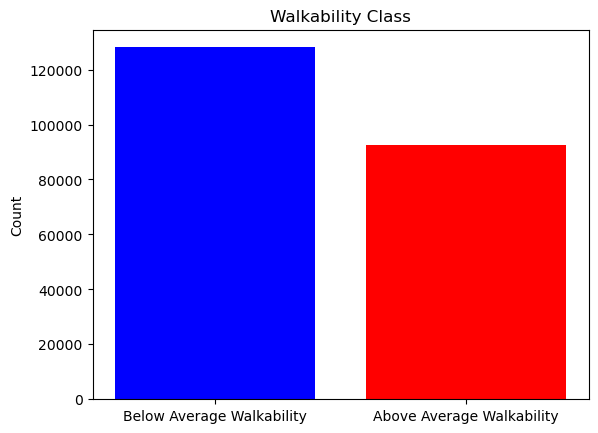

In [13]:
import matplotlib.pyplot as plt
plt.bar(value_counts.index, value_counts.values,color=['blue','red'])
# add labels and title to the plot
plt.xticks([0, 1], ['Below Average Walkability', 'Above Average Walkability'])
plt.ylabel('Count')
plt.title('Walkability Class')

# show the plot
plt.show()

In [14]:
#identify target and features
X = df.drop(columns = 'NatWalkInd')
y = df['NatWalkInd'] # we want to predict the walkability class - either above average walkability - 1 or below average walkability - 0

In [15]:
#perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
#instantiate column selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [17]:
#intantiate imputers for missing values
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

#instantiate the encoder and scalers
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False)

In [18]:
#instantiate the numerical pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [19]:
#instantiate the categorical pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [20]:
#create the tuple for column transformer
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

#create the preprocessor column transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough', verbose_feature_names_out=False)

In [21]:
#transform the data
#fit only the train data
preprocessor.fit(X_train)

#trainsform train and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
X_train_processed

,OBJECTID,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,...,"CBSA_Name_Worthington, MN","CBSA_Name_Yakima, WA","CBSA_Name_Yankton, SD","CBSA_Name_Yauco, PR","CBSA_Name_York-Hanover, PA","CBSA_Name_Youngstown-Warren-Boardman, OH-PA","CBSA_Name_Yuba City, CA","CBSA_Name_Yuma, AZ","CBSA_Name_Zanesville, OH","CBSA_Name_Zapata, TX"
162938,0.826823,3.003217,3.009904,3.039379,-0.079893,-0.030836,-0.079528,-0.164016,0.033541,0.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25426,-1.330805,0.202831,0.129502,0.133622,-0.056064,-0.029736,-0.054283,-0.124140,1.274285,2.528233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131964,0.340826,-0.690861,-0.678834,-0.680828,0.517257,0.045003,0.544007,1.336929,-0.729684,0.519505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199794,1.405111,-0.686036,-0.674233,-0.680630,0.130399,-0.027758,0.144505,0.504475,0.279872,0.285810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200487,1.415985,-0.585300,-0.580691,-0.586108,-0.079080,-0.030836,-0.078659,-0.161333,-0.348072,-0.780260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.151207,-0.489208,-0.446815,-0.473697,-0.077341,-0.030789,-0.076811,-0.155630,1.067326,0.587776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,-0.102743,-0.684844,-0.675425,-0.675412,0.274086,0.040535,0.285119,0.961541,-0.162313,0.375087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131932,0.340324,-0.154384,-0.131869,-0.125403,-0.069920,-0.030836,-0.068876,-0.131136,3.137925,3.218815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,0.574661,3.003217,3.009904,3.039379,-0.079237,-0.030836,-0.078827,-0.161852,-0.757951,-0.819646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y_train

162938    1
25426     0
131964    0
199794    0
200487    1
         ..
119879    1
103694    0
131932    0
146867    1
121958    0
Name: NatWalkInd, Length: 165555, dtype: int64

## Logistic Regression without PCA

In [24]:
#import classifier Machine Learning Libraries
from sklearn.linear_model import LogisticRegression

import sklearn.metrics as metrics

In [25]:
def get_performance(actual_Y, pred_Y): # defining performance of logistic reg
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

### Using liblinear solver which works well for smaller datasets and good to start with

In [26]:
#instantiate the model
LL = LogisticRegression(solver='liblinear',max_iter=200) # liblinear solver works well for smaller datasets 

#fit 
LL.fit(X_train_processed, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [27]:
pred_y_test=LL.predict(X_test_processed)

In [28]:
from sklearn.metrics import r2_score


In [29]:
pseudo_r2_train = 1 - (LL.score(X_train_processed, y_train) / np.log(y_train.shape[0])) #  McFadden's pseudo R-squared
# for the train data

In [30]:
pseudo_r2_test = 1 - (LL.score(X_test_processed, y_test) / np.log(y_test.shape[0])) #  McFadden's pseudo R-squared
# for the test data

In [31]:
print('Before PCA with liblinear solver pseudo R squared train data:')
print(pseudo_r2_train )
print('-' * 80)
print('Before PCA with liblinear solver pseudo R squared test data:')
print(pseudo_r2_test)
print('-' * 80)


Before PCA with liblinear solver pseudo R squared train data:
0.9221406216370864
--------------------------------------------------------------------------------
Before PCA with liblinear solver pseudo R squared test data:
0.9143119559644434
--------------------------------------------------------------------------------


In [32]:
accuracy_ll, sensitivity_ll, specificity_ll = get_performance(y_test, pred_y_test)


In [33]:
perf1 = pd.DataFrame([accuracy_ll], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression'])

perf1['sensitivity'] = np.asarray([sensitivity_ll])

perf1['specificity'] = np.asarray([specificity_ll])

perf1 # our main performance indicators for the logistic reg look good

,accuracy,sensitivity,specificity
Logistic Regression,0.93558,0.930363,0.942748


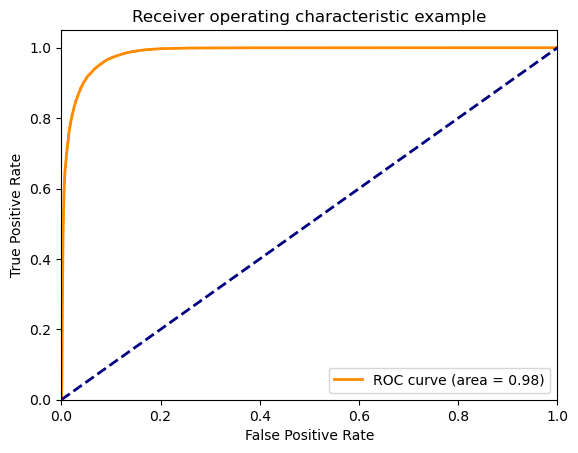

In [34]:
from sklearn.metrics import roc_curve, auc
score_Y_dt = LL.predict_proba(X_test_processed) # probability
fpr, tpr, _ = roc_curve(y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Using lbfgs solver which works well for large datasets but it did not converge in our data

In [ ]:
#instantiate the model
LL = LogisticRegression(solver='lbfgs',max_iter=200) # this did not converge
# should we mention it in the report? 

#fit 
LL.fit(X_train_processed, y_train)

## Logistic Regression with PCA

### liblinear solver

In [35]:
from sklearn.decomposition import PCA

In [36]:
#fit data for pca
pca = PCA(n_components = 0.9) # keeping 90% variance
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

pca.fit(X_train_pca)

# Here I use PCA for feature selection
# I will use the selected principal components as the reduced set of features for the logistic regression model.

PCA(n_components=0.9)

In [37]:
#instantiate the model
LL = LogisticRegression(solver='liblinear',max_iter=200) # liblinear solver works well for smaller datasets 

#fit 
LL.fit(X_train_pca, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [38]:
pred_y_test=LL.predict(X_test_pca)

In [39]:
pseudo_r2_train = 1 - (LL.score(X_train_pca, y_train) / np.log(y_train.shape[0])) #  McFadden's pseudo R-squared
pseudo_r2_test = 1 - (LL.score(X_test_pca, y_test) / np.log(y_test.shape[0])) #  McFadden's pseudo R-squared


In [40]:
print('After PCA with liblinear solver pseudo R squared train data:')
print(pseudo_r2_train )
print('-' * 80)
print('After PCA with liblinear solver pseudo R squared test data:')
print(pseudo_r2_test)
print('-' * 80)



After PCA with liblinear solver pseudo R squared train data:
0.9228815172065308
--------------------------------------------------------------------------------
After PCA with liblinear solver pseudo R squared test data:
0.9151152295130238
--------------------------------------------------------------------------------


In [41]:
accuracy_ll, sensitivity_ll, specificity_ll = get_performance(y_test, pred_y_test)


In [42]:
perf2 = pd.DataFrame([accuracy_ll], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression'])

perf2['sensitivity'] = np.asarray([sensitivity_ll])

perf2['specificity'] = np.asarray([specificity_ll])

perf2 # this is worse than we had before, we can try different solver

,accuracy,sensitivity,specificity
Logistic Regression,0.92681,0.930081,0.922316


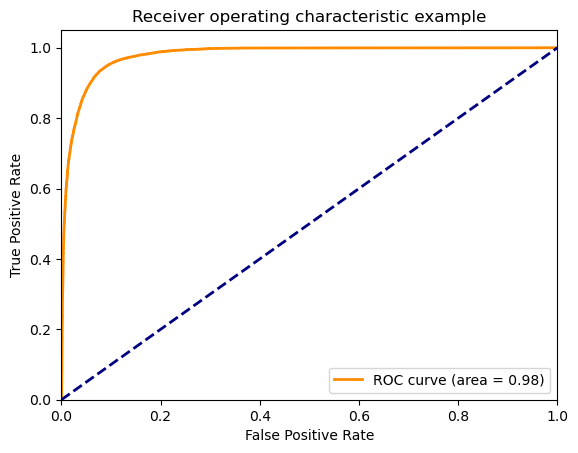

In [43]:
from sklearn.metrics import roc_curve, auc
score_Y_dt = LL.predict_proba(X_test_pca) # probability
fpr, tpr, _ = roc_curve(y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [44]:
print('Before PCA:')
print(perf1)
print('-' * 80)
print('After PCA with liblinear solver:')
print(perf2)
print('-' * 80)


Before PCA:
                     accuracy  sensitivity  specificity
Logistic Regression   0.93558     0.930363     0.942748
--------------------------------------------------------------------------------
After PCA with liblinear solver:
                     accuracy  sensitivity  specificity
Logistic Regression   0.92681     0.930081     0.922316
--------------------------------------------------------------------------------


### Using lbfsg solver - good for medium datasets

In [45]:
from sklearn.decomposition import PCA

In [46]:
#fit data for pca
pca = PCA(n_components = 0.95) # keeping 95% variance
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

pca.fit(X_train_pca)

PCA(n_components=0.95)

In [47]:
#instantiate the model
LL = LogisticRegression(solver='lbfgs',max_iter=200) # liblinear solver works well for smaller datasets 

#fit 
LL.fit(X_train_pca, y_train)

LogisticRegression(max_iter=200)

In [48]:
pred_y_test=LL.predict(X_test_pca)

In [49]:
accuracy_ll, sensitivity_ll, specificity_ll = get_performance(y_test, pred_y_test)


In [50]:
perf3 = pd.DataFrame([accuracy_ll], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression'])

perf3['sensitivity'] = np.asarray([sensitivity_ll])

perf3['specificity'] = np.asarray([specificity_ll])

perf3 # this is worse than perf1

,accuracy,sensitivity,specificity
Logistic Regression,0.932464,0.929862,0.936038


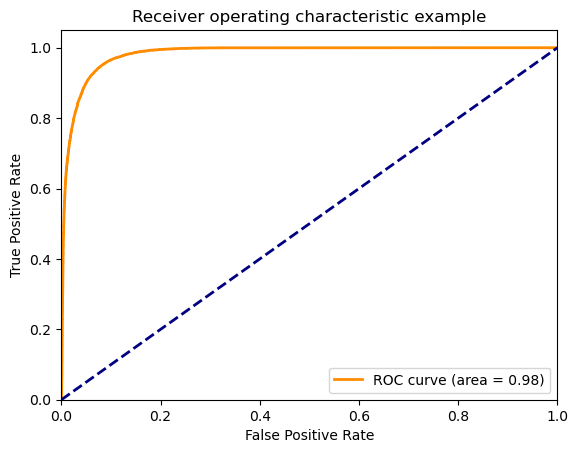

In [51]:
from sklearn.metrics import roc_curve, auc
score_Y_dt = LL.predict_proba(X_test_pca) # probability
fpr, tpr, _ = roc_curve(y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
print('Before PCA:')
print(perf1)
print('-' * 80)
print('After PCA with liblinear solver:')
print(perf2)
print('-' * 80)
print('After PCA with lbfgs solver:')
print(perf3)
print('-' * 80)

Before PCA:
                     accuracy  sensitivity  specificity
Logistic Regression   0.93558     0.930363     0.942748
--------------------------------------------------------------------------------
After PCA with liblinear solver:
                     accuracy  sensitivity  specificity
Logistic Regression   0.92681     0.930081     0.922316
--------------------------------------------------------------------------------
After PCA with lbfgs solver:
                     accuracy  sensitivity  specificity
Logistic Regression  0.932464     0.929862     0.936038
--------------------------------------------------------------------------------
